In [1]:
import sys
import datetime as dt
import pandas as pd
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

/home/yijie/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# EDA Of Bayer Sentiment Analysis Data
This notebook serves as a encapsulated EDA notebook of the sentiment analysis data for DatSci NLP Task
(c) Yijie Xu

In [2]:
sys.path.insert(0, '..') # Set root directory

In [3]:
sys.path

['..',
 '/home/yijie/Documents/Bayer/BayerNLP/notebooks',
 '/home/yijie/anaconda3/lib/python38.zip',
 '/home/yijie/anaconda3/lib/python3.8',
 '/home/yijie/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/yijie/anaconda3/lib/python3.8/site-packages']

In [4]:
data =pd.read_csv("../data/sentences_with_sentiment.csv",sep=",")

In [5]:
data

,ID,Sentence,Positive,Negative,Neutral
0,1,The results in 2nd line treatment show an ORR ...,1,0,0
1,2,The long duration of response and high durable...,1,0,0
2,3,The median OS time in the updated results exce...,0,0,1
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0
4,5,"The data provided in 1st line, although prelim...",1,0,0
5,6,Taking into account the intrinsic limitation o...,1,0,0
6,7,This medicinal product has been authorised und...,0,0,1
7,8,This means that further evidence on this medic...,0,1,0
8,9,The European Medicines Agency will review new ...,0,0,1
9,10,The CHMP considers the following measures nece...,0,1,0


# Data Inspection and Analysis
Research Questions

• Is the dataset balanced?

• Is the amount of data sufficient for allowing a hold-out dataset?

• Do you have enough data to consider deep neural architectures or
might good feature engineering with more shallow models suffice?

• During the data collection process, for some sentences multiple experts
disagreed on the sentiment of a given sentence, how could you capture
such an ambiguity in your model and potentially notify users about
such unclear instances?

• How does your model come to a specific conclusion, what about model
interpretability?

• Think beyond the pure sentiment analysis of sentences, e.g. how would
you automatically extract relevant sentences from EPARs and ensure
that the analysis is only applied to specific sections? It is worth to
explore some EPARs on the EMA we

In [6]:
print(len(data)) # 266 Rows of data

266


In [7]:
#Classes
data["Positive"].value_counts()

1    160
0    106
Name: Positive, dtype: int64

In [8]:
data['Negative'].value_counts()

0    230
1     36
Name: Negative, dtype: int64

In [9]:
data['Neutral'].value_counts()

0    196
1     70
Name: Neutral, dtype: int64

In [10]:
pos=data["Positive"].value_counts()[1]
neg=data["Negative"].value_counts()[1]
neu= data["Neutral"].value_counts()[1]

In [11]:
#Check that no overlap occurs per row by summing in across columns

data["check"] =data[["Neutral","Negative","Positive"]].sum(axis=1)
data

,ID,Sentence,Positive,Negative,Neutral,check
0,1,The results in 2nd line treatment show an ORR ...,1,0,0,1
1,2,The long duration of response and high durable...,1,0,0,1
2,3,The median OS time in the updated results exce...,0,0,1,1
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,1
4,5,"The data provided in 1st line, although prelim...",1,0,0,1
5,6,Taking into account the intrinsic limitation o...,1,0,0,1
6,7,This medicinal product has been authorised und...,0,0,1,1
7,8,This means that further evidence on this medic...,0,1,0,1
8,9,The European Medicines Agency will review new ...,0,0,1,1
9,10,The CHMP considers the following measures nece...,0,1,0,1


# Visualizations

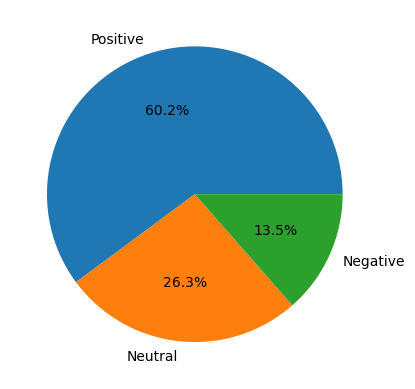

In [12]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array([pos, neu, neg])
mylabels = ["Positive", "Neutral", "Negative"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.show() 

Data is not balanced at all, significant overrepresentation of Positive, with Negative freq 1/5 of Positive and 1/2 Neutral. This will have significant implications on balanced training and testing data, stratification will help.

Amount of data is poor, 266 rows, maybe insuffcient for deep learning approaches, but enough fror trad. stat. ML.

Let's examine most frequent words using wordcloud

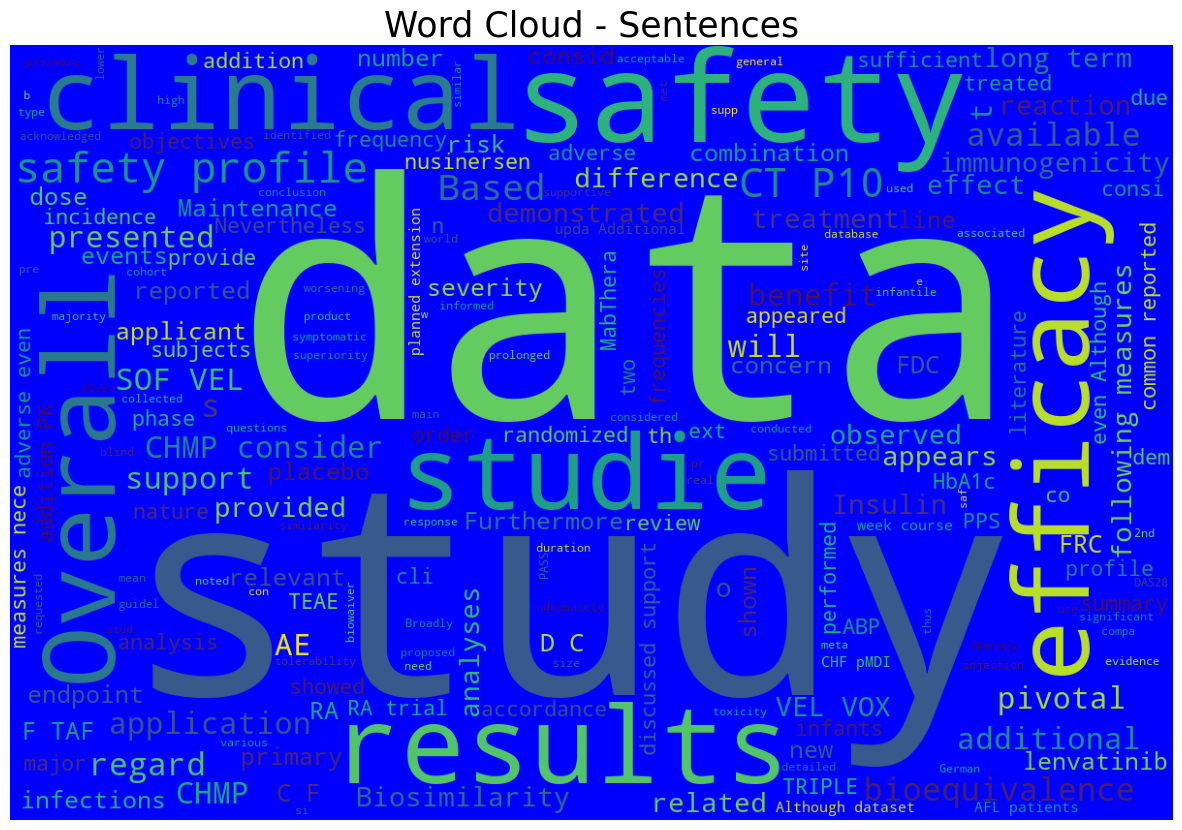

In [13]:
# OVerall data sentiment analysis

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['Sentence']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Sentences', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

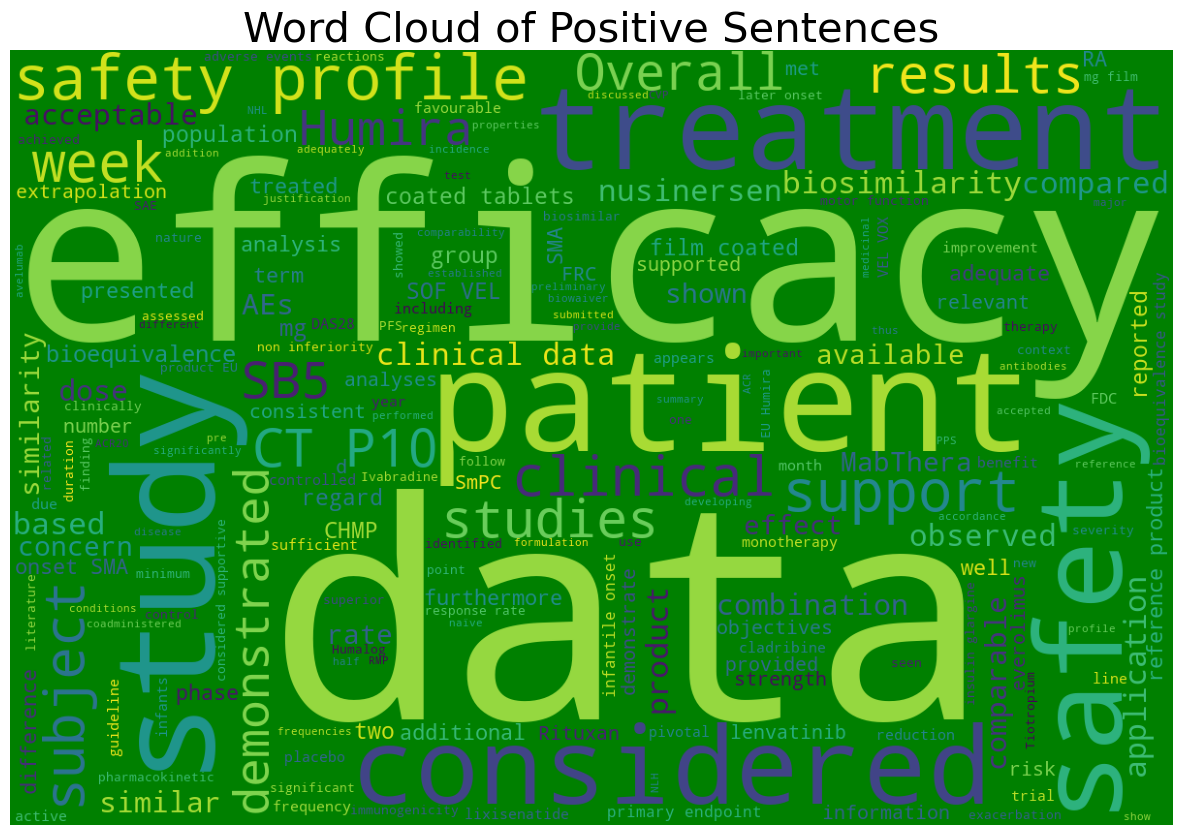

In [14]:
#Positive sentiment analysis - Efficacy seems to be a strong word thats common to positive sentiment

# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['Sentence'][data['Positive'] == 1]])


stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'green', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Sentences', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

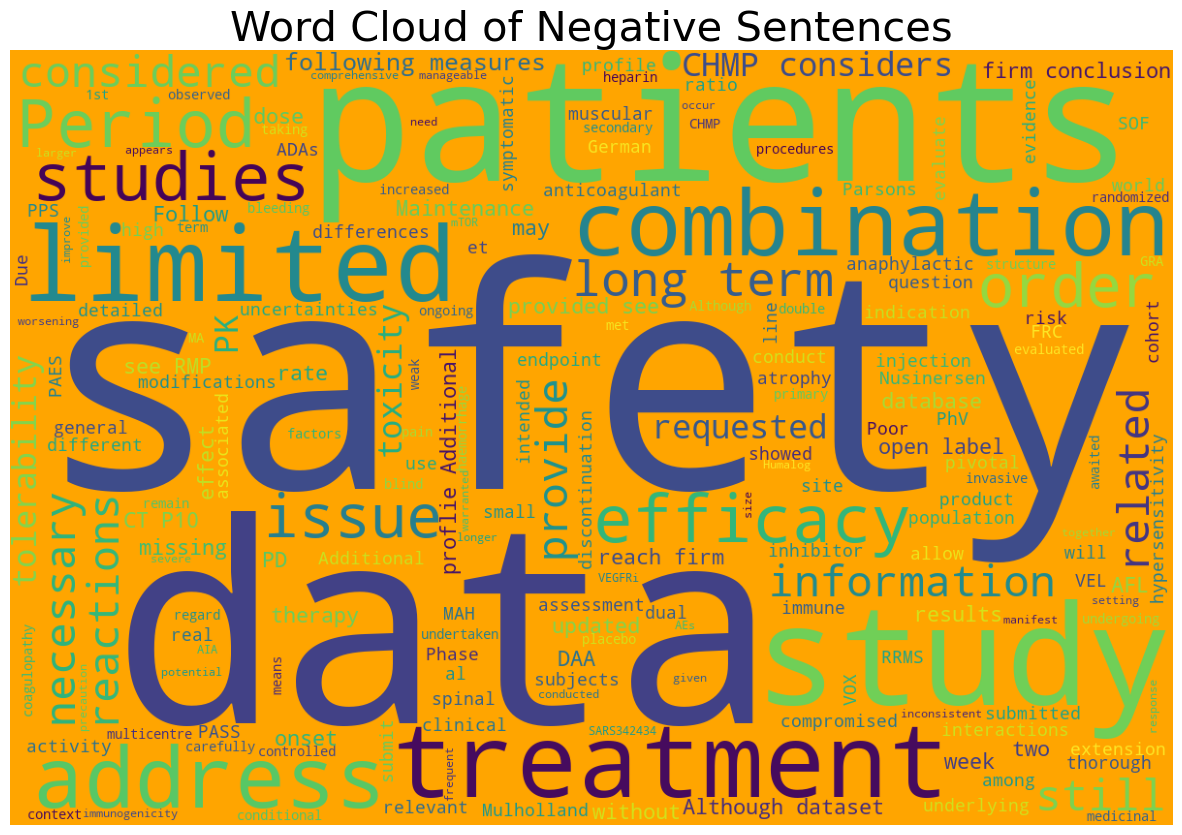

In [15]:
#Negative sentiment analysis


negative_sentiments = " ".join([text for text in data['Sentence'][data['Negative'] == 1]])


stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Sentences', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

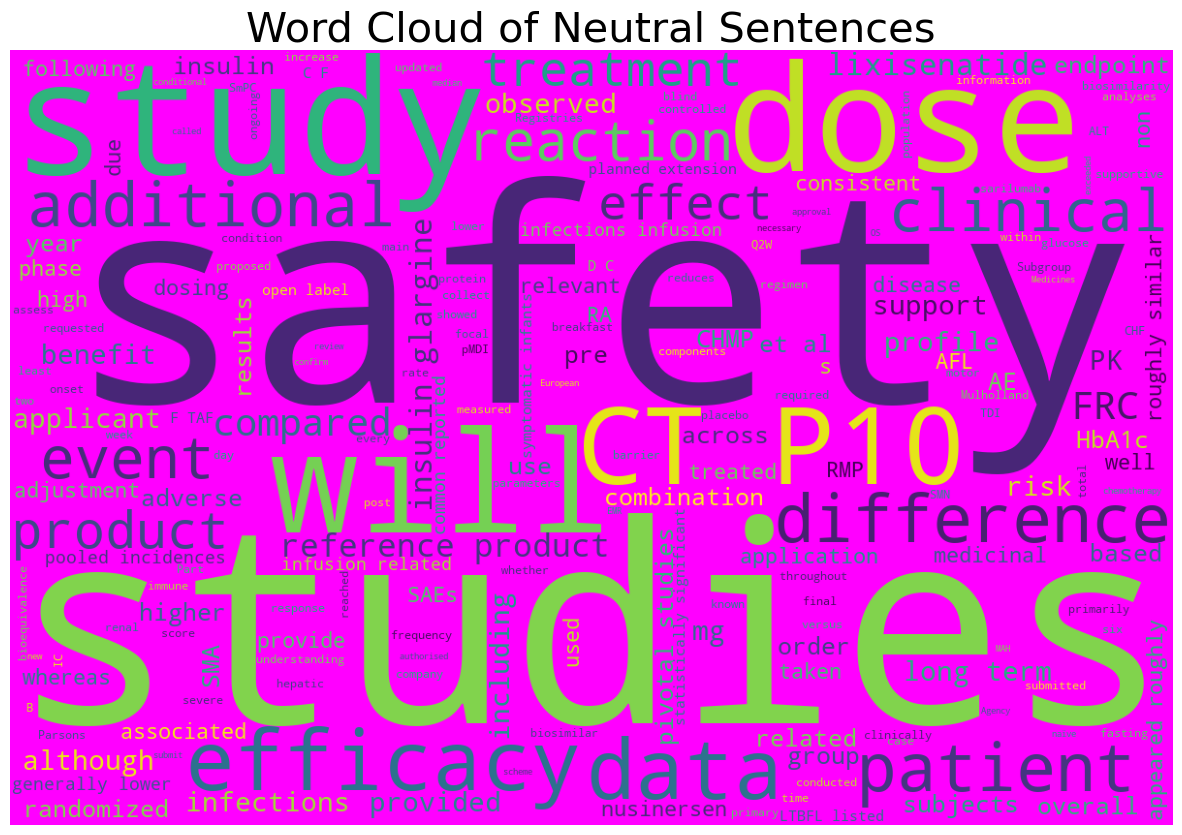

In [16]:
#Neutral sentiment analysis


positive_sentiments = " ".join([text for text in data['Sentence'][data['Neutral'] == 1]])


stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Neutral Sentences', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Data Cleaning and Processing
Perform a Null check and proceed with stemming and other cleaning.
Some basic NLP processes, such as stemming and polarity, also done

In [17]:
data.isnull().values.any()

False

In [18]:
#Lets combine all of the sentiments into a single polarity feature 
# Three classes here, 1,0, -1
def convert_sentiment(row):
    if row['Positive'] == 1:
        val = 1
    elif row['Negative'] ==1:
        val=-1
    else:
        val=0
    return val


In [19]:
data["sentiment"]=data.apply(lambda row: convert_sentiment(row), axis=1)

In [20]:
data.head(20)

,ID,Sentence,Positive,Negative,Neutral,check,sentiment
0,1,The results in 2nd line treatment show an ORR ...,1,0,0,1,1
1,2,The long duration of response and high durable...,1,0,0,1,1
2,3,The median OS time in the updated results exce...,0,0,1,1,0
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,1,1
4,5,"The data provided in 1st line, although prelim...",1,0,0,1,1
5,6,Taking into account the intrinsic limitation o...,1,0,0,1,1
6,7,This medicinal product has been authorised und...,0,0,1,1,0
7,8,This means that further evidence on this medic...,0,1,0,1,-1
8,9,The European Medicines Agency will review new ...,0,0,1,1,0
9,10,The CHMP considers the following measures nece...,0,1,0,1,-1


In [21]:
#Data cleaning and standardization

def clean(sentence): 
    # changing to lower case
    lower = sentence.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe



In [22]:
data['clean'] =clean(data['Sentence'])


/tmp/ipykernel_4108/3656983924.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
/tmp/ipykernel_4108/3656983924.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
/tmp/ipykernel_4108/3656983924.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
/tmp/ipykernel_4108/3656983924.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
/tmp/ipykernel_4108/3656983924.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [23]:
# Removing the stopwords
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')

import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
stop_words = set(stopwords.words('english'))
data['clean'] = data['clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


[nltk_data] Downloading package stopwords to /home/yijie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Can also stem words
Snow_ball = SnowballStemmer("english")
data['clean_stem'] = data['clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [25]:
# Examine review polarity - HOW IS THIS DONE?

def sentiment(text):
    # Sentiment polarity of the reviews
    pol = []
    for i in text:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

    

In [26]:
# Various polarity definitions using Textblob from NLTK, as a baseline - will need to calculate metrics lataer
data['polarity'] = sentiment(data['Sentence'])
data['polarity_clean']=sentiment(data['clean'])
data['polarity_clean_stem']=sentiment(data['clean_stem'])
data.head()


,ID,Sentence,Positive,Negative,Neutral,check,sentiment,clean,clean_stem,polarity,polarity_clean,polarity_clean_stem
0,1,The results in 2nd line treatment show an ORR ...,1,0,0,1,1,results 2nd line treatment show orr 33 patient...,result 2nd line treatment show orr 33 patient ...,0.025000,0.025000,0.000000
1,2,The long duration of response and high durable...,1,0,0,1,1,long duration response high durable response r...,long durat respons high durabl respons rate ob...,0.036667,0.055000,0.055000
2,3,The median OS time in the updated results exce...,0,0,1,1,0,median os time updated results exceeded 1 year,median os time updat result exceed 1 year,0.000000,0.000000,0.000000
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,1,1,therefore clinical benefit 2nd line treatment ...,therefor clinic benefit 2nd line treatment con...,0.291667,0.291667,0.000000
4,5,"The data provided in 1st line, although prelim...",1,0,0,1,1,data provided 1st line although preliminary sh...,data provid 1st line although preliminari show...,-0.083333,-0.083333,-0.083333


In [27]:
#Create Features for use in LightGBM /XGBOOST

#Word count in each review
data['count_word']=data["clean_stem"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["clean_stem"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["Sentence"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["Sentence"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["Sentence"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["Sentence"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["Sentence"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["clean_stem"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [28]:
data.head()

,ID,Sentence,Positive,Negative,Neutral,check,sentiment,clean,clean_stem,polarity,polarity_clean,polarity_clean_stem,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,1,The results in 2nd line treatment show an ORR ...,1,0,0,1,1,results 2nd line treatment show orr 33 patient...,result 2nd line treatment show orr 33 patient ...,0.025000,0.025000,0.000000,14,13,133,1,2,1,9,5.142857
1,2,The long duration of response and high durable...,1,0,0,1,1,long duration response high durable response r...,long durat respons high durabl respons rate ob...,0.036667,0.055000,0.055000,18,14,170,4,0,1,8,5.444444
2,3,The median OS time in the updated results exce...,0,0,1,1,0,median os time updated results exceeded 1 year,median os time updat result exceed 1 year,0.000000,0.000000,0.000000,8,8,57,0,1,1,3,4.250000
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,1,1,therefore clinical benefit 2nd line treatment ...,therefor clinic benefit 2nd line treatment con...,0.291667,0.291667,0.000000,14,13,161,1,0,1,9,6.857143
4,5,"The data provided in 1st line, although prelim...",1,0,0,1,1,data provided 1st line although preliminary sh...,data provid 1st line although preliminari show...,-0.083333,-0.083333,-0.083333,26,24,247,4,0,1,15,5.692308


In [29]:
#drop the NaN
data =data.drop(columns=["check","ID"])

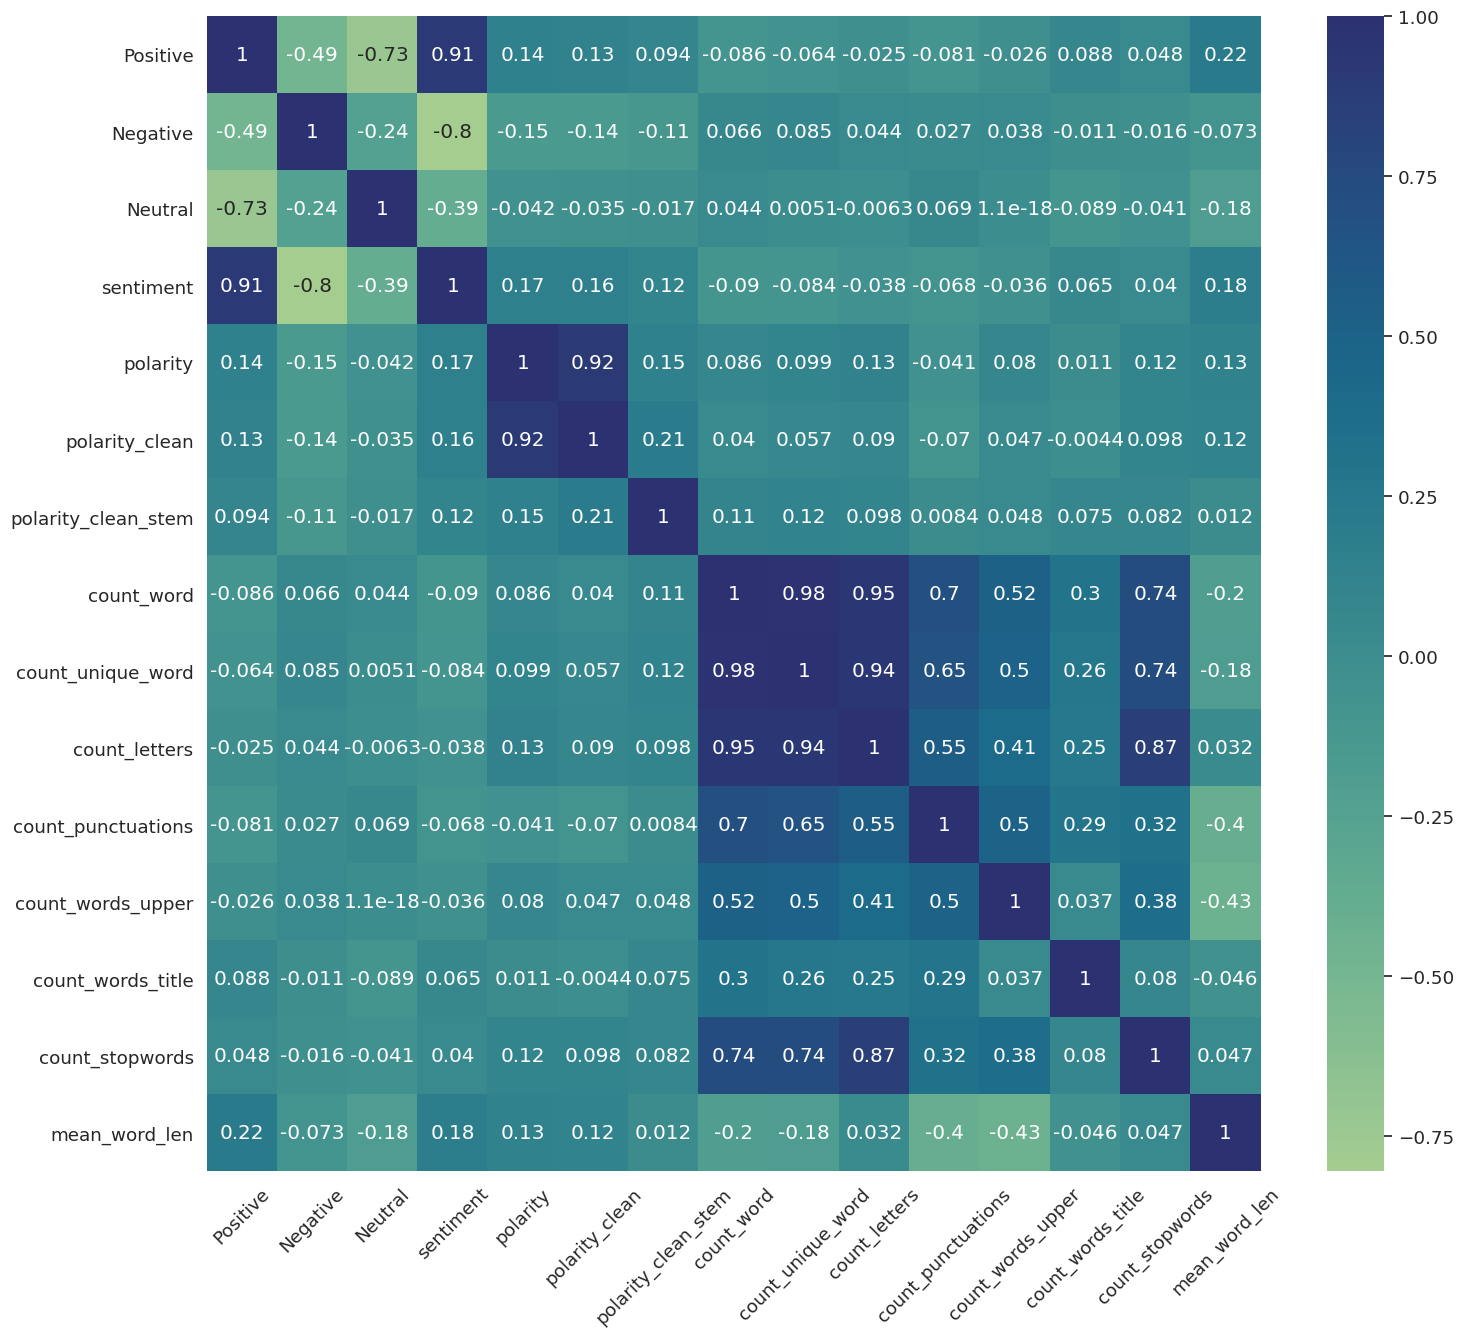

In [30]:
# Correlation matrix, also compare to polarity!
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = ['int64','float64']).corr()
sns_ = sns.heatmap(corr, annot = True ,cmap="crest")
plt.setp(sns_.get_xticklabels(), rotation = 45);

# Baseline
Our first baseline is  a basic lightGBM attempt, using our statistical features.
LGBM is a gradient boosted tree method that is light, fast, and flexible.
Results obtained with hyperparameter tuning GridSearchCV.

Note for scoring, we utilize f1 to better handle the class imbalance
#https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2


In [107]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score,balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


In [33]:


features = data[['polarity_clean','polarity','polarity_clean_stem',  'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42,stratify=target)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (212, 11)
The Test set size  (54, 11)


In [99]:
#Define general purpose hyperparam CV function
#Note that GridSearchCV auto f the estimator is a classifier and y is either binary or multiclass, StratifiedKFold 
def hyperparam_tune(clf, params):
    if clf == "lgbm":
        clf = LGBMClassifier(seed=42)
        
    search = GridSearchCV(clf,params,scoring='balanced_accuracy') #Handling imbalance, average of recall obtained on each class.
    search.fit(X=X_train, y=y_train)
    best = search.best_params_
    predicted = search.predict(X_test)
    accuracy =accuracy_score(y_test, predicted)
    accuracy_b =balanced_accuracy_score(y_test, predicted)
    f1 =f1_score(y_test, predicted,average="weighted") #Weighted chosen to account for imbalance
    report = classification_report(y_test, predicted)
    
    return best,accuracy,accuracy_b,f1,report, search
        
    

params = {
        'learning_rate': [0.01,0.05, 0.1, 0.3,0.5],
        'max_depth' : [-1,5,10],
        'num_leaves' : [2,5,10,20,31],
        'colsample_bytree' :  [0.1,0.5,1],
        'n_estimators':  [25,50,100,150,200,]
    }

In [100]:
best,acc,acc_b,f1,rep,clfr = hyperparam_tune("lgbm",params)

In [101]:
best

{'colsample_bytree': 0.1,
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 100,
 'num_leaves': 10}

In [102]:
acc

0.6481481481481481

In [103]:
acc_b

0.5486111111111112

In [104]:
f1

0.6317208782659307

In [105]:
print(rep)

              precision    recall  f1-score   support

          -1       0.50      0.38      0.43         8
           0       0.64      0.44      0.52        16
           1       0.68      0.83      0.75        30

    accuracy                           0.65        54
   macro avg       0.60      0.55      0.56        54
weighted avg       0.64      0.65      0.63        54



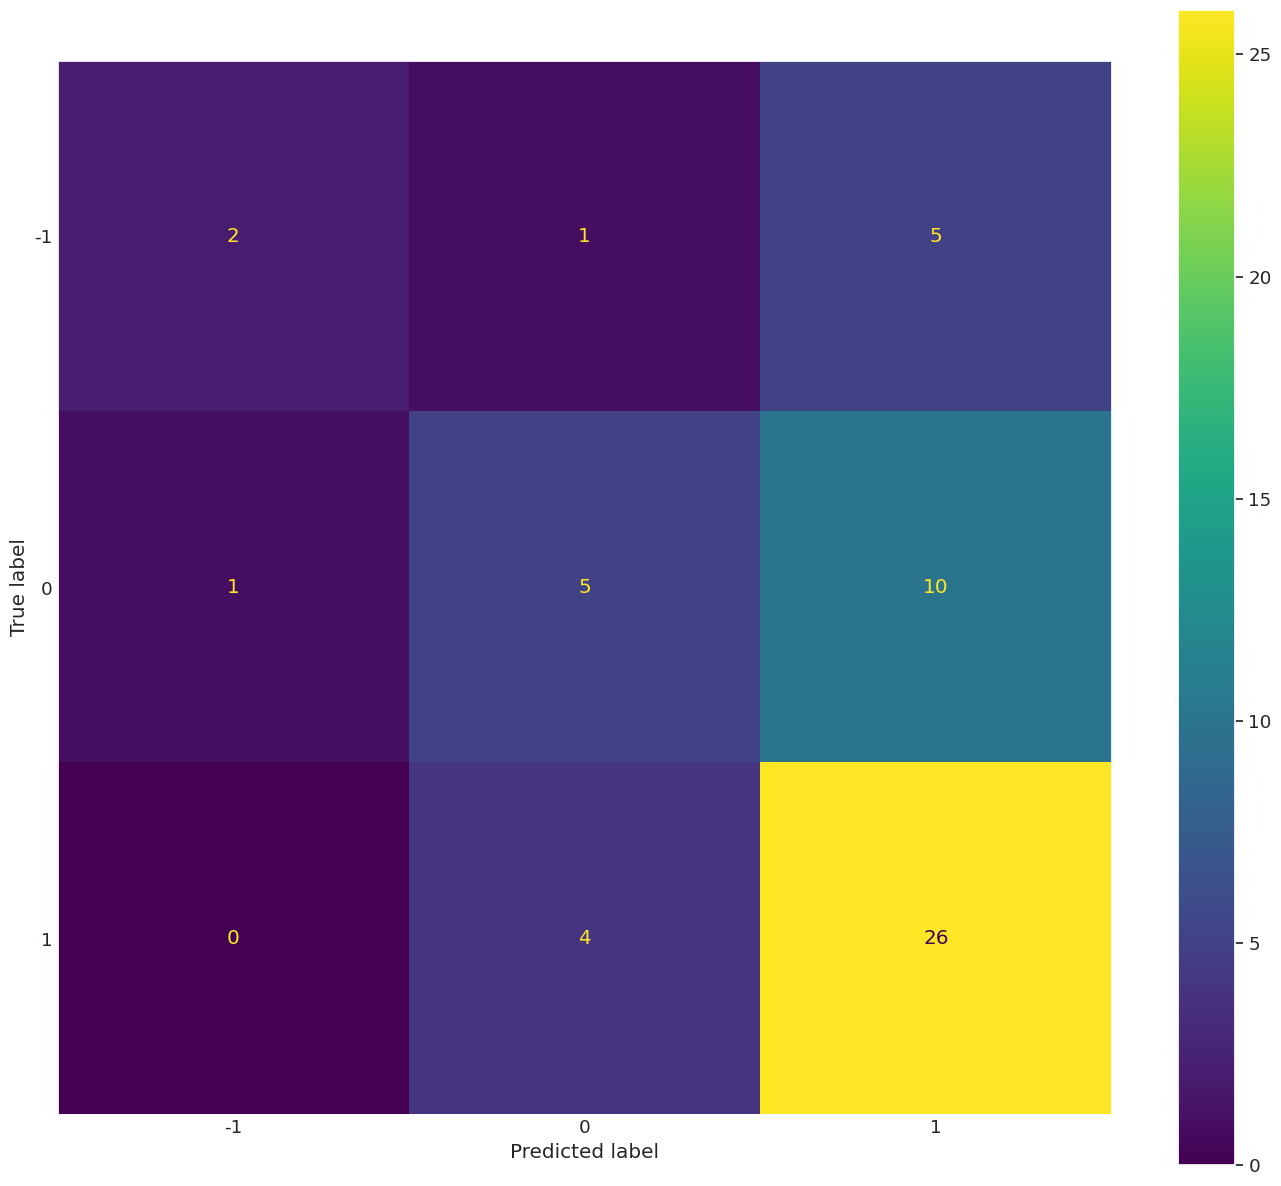

In [109]:
cm=confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfr.classes_)
disp.plot()
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

#Visualize Confusion Matrix

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

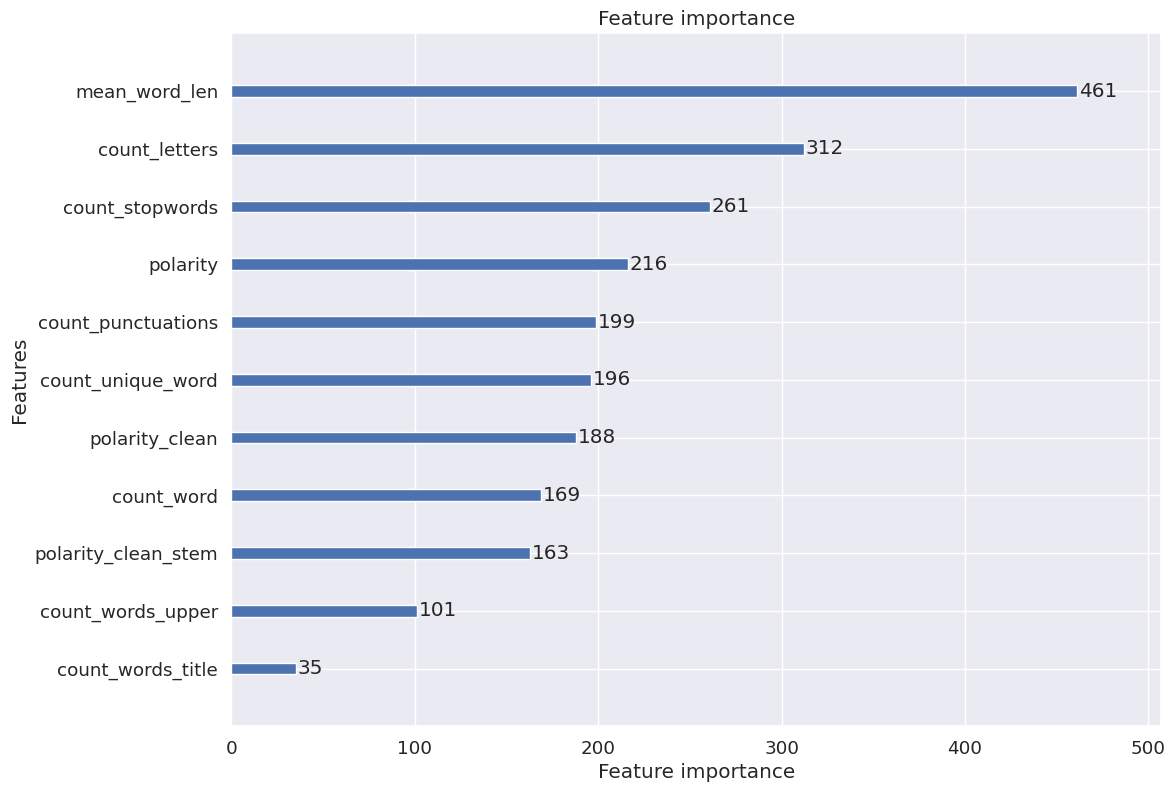

In [110]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model)